In [75]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import os 
import json
import requests
import hvplot.pandas

# Import API key
from api_keys import geoapify_key

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Add new cleaned csv files with NA columns removed 
amazon_data = Path("Amazon_Prime_data/amazon_cleaned.csv")
apple_data = Path("Apple_data/apple_cleaned.csv")
hulu_data = Path("Hulu_data/hulu_cleaned.csv")
hbo_data = Path("HBO_data/hbo_cleaned.csv")
netflix_data = Path("Netflix_data/netflix_cleaned.csv")

# Load the data and read into DataFrames
amazon_data_df = pd.read_csv(amazon_data)
apple_data_df = pd.read_csv(apple_data)
hulu_data_df = pd.read_csv(hulu_data)
hbo_data_df = pd.read_csv(hbo_data)
netflix_data_df = pd.read_csv(netflix_data)


In [77]:
# Show the first 5 rows of each the DataFrame for Amazon 
amazon_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Blondie,movie,"Comedy, Family",1938,6.9,ZA
1,Four Rooms,movie,Comedy,1995,6.7,"AT, DE"
2,Judgment Night,movie,"Action, Crime, Drama",1993,6.6,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, PA, PE..."
3,Forrest Gump,movie,"Drama, Romance",1994,8.8,"AD, CU, FR, GB, GF, GG, GI, IE, IN, JP, MC, PF..."
4,Citizen Kane,movie,"Drama, Mystery",1941,8.3,"AD, CA, ES, IN, JP"


In [78]:
# Apple Data
apple_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Four Rooms,movie,Comedy,1995,6.7,DE
1,Forrest Gump,movie,"Drama, Romance",1994,8.8,"AU, CA, US"
2,American Beauty,movie,Drama,1999,8.3,"AT, CH, DE, FR, GB, IE, IT"
3,Citizen Kane,movie,"Drama, Mystery",1941,8.3,"DE, GB"
4,Metropolis,movie,"Drama, Sci-Fi",1927,8.3,GB


In [79]:
# Hulu Data
hulu_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Ariel,movie,"Comedy, Crime, Romance",1988,7.4,JP
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986,7.5,JP
2,Forrest Gump,movie,"Drama, Romance",1994,8.8,JP
3,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,JP
4,My Life Without Me,movie,"Drama, Romance",2003,7.4,JP


In [80]:
# HBO Data
hbo_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,"DK, FI, NO, SE"
1,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,"HK, ID, MY, PH, SG, TH, TW"
2,Unforgiven,movie,"Drama, Western",1992.0,8.2,"AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR, DO..."
3,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
4,A History of Violence,movie,"Action, Crime, Drama",2005.0,7.4,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."


In [81]:
# Netflix Data
netflix_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,"AD, AE, AG, AO, BH, BM, BS, BZ, CI, CM, CO, CR..."
3,Unforgiven,movie,"Drama, Western",1992,8.2,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


In [82]:
# Add a new column to identify the streaming service
amazon_data_df["Streaming Service"] = "Amazon"
apple_data_df["Streaming Service"] = "Apple"
hulu_data_df["Streaming Service"] = "Hulu"
hbo_data_df["Streaming Service"] = "HBO"
netflix_data_df["Streaming Service"] = "Netflix"

# Combine all the dataframes into one DataFrame
all_data = pd.concat([amazon_data_df, apple_data_df, hulu_data_df, hbo_data_df, netflix_data_df], join='inner')

# Create new column for each streaming service within the new DataFrame
all_data.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries,Streaming Service
0,Blondie,movie,"Comedy, Family",1938.0,6.9,ZA,Amazon
1,Four Rooms,movie,Comedy,1995.0,6.7,"AT, DE",Amazon
2,Judgment Night,movie,"Action, Crime, Drama",1993.0,6.6,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, PA, PE...",Amazon
3,Forrest Gump,movie,"Drama, Romance",1994.0,8.8,"AD, CU, FR, GB, GF, GG, GI, IE, IN, JP, MC, PF...",Amazon
4,Citizen Kane,movie,"Drama, Mystery",1941.0,8.3,"AD, CA, ES, IN, JP",Amazon


In [83]:
# IMDB average rating for each streaming service 
imdb_rating = all_data.groupby("Streaming Service")["IMDB Average Rating"].mean().reset_index()
imdb_rating

,Streaming Service,IMDB Average Rating
0,Amazon,5.953446
1,Apple,6.385585
2,HBO,6.688892
3,Hulu,6.566648
4,Netflix,6.398585


In [84]:
# Print which is the highest rated streaming service
highest_rated = imdb_rating.loc[imdb_rating["IMDB Average Rating"].idxmax()]
print(f"The highest rated streaming service is {highest_rated['Streaming Service']} with an average rating of {highest_rated['IMDB Average Rating']}")

The highest rated streaming service is HBO with an average rating of 6.688891506655672


WRITTEN ANALYSIS HERE. 
1. Which streaming service is most popular based on IMBD rating and why. Go into a detailed analysis here and why we think this is. Is there a reason. 

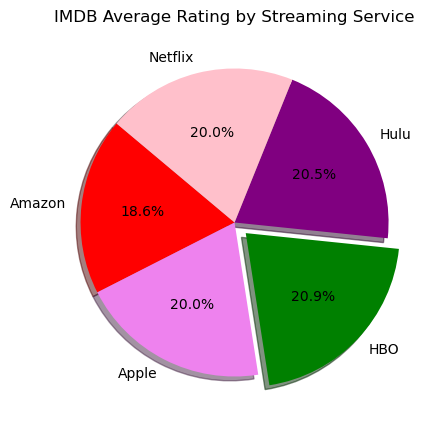

In [105]:
# Create a pie chart of all the streaming services to show which one has the highest average rating IMDB rating
imdb_rating.plot.pie(y="IMDB Average Rating", 
                     labels=imdb_rating["Streaming Service"], 
                     autopct="%1.1f%%", title="IMDB Average Rating by Streaming Service", 
                     figsize=(5, 5), legend=False, shadow=True, explode=(0, 0, 0.1, 0, 0), 
                     startangle=140, colors=["red", "violet", "green", "purple", "pink"]) 
plt.ylabel('')

# Save the pie chart
plt.savefig("Images/IMDB_Average_Rating_by_Streaming_Service.png")

WRITTEN ANALYSIS HERE. 
1. Go into analysis here about the pie chart. Disucss which one has the highest rating. 

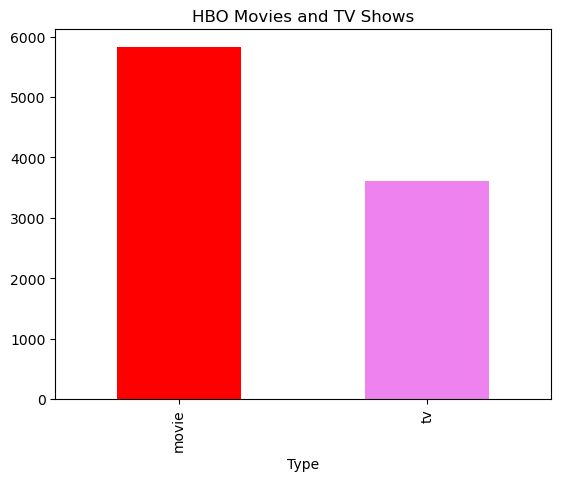

In [106]:
# Create a bar chat to show the number of movies and TV shows for HBO
hbo_data_df["Type"].value_counts().plot(kind="bar", 
                                        title="HBO Movies and TV Shows", 
                                        color=["red", "violet"])

# save the bar chart
plt.savefig("Images/HBO_Movies_and_TV_Shows.png")

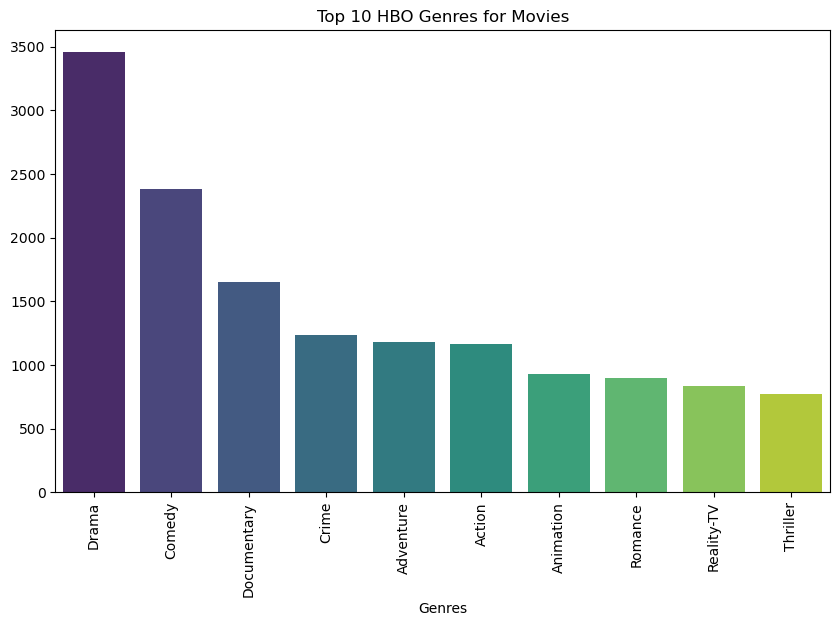

<Figure size 640x480 with 0 Axes>

In [107]:
# Filter the data to include only movies
hbo_movies = hbo_data_df[hbo_data_df['Type'] == 'movie']

# Split the by genres and explode the dataframe so each genre has its own row
hbo_genres = hbo_data_df['Genres'].str.split(', ').explode('Genres')

# Get the top 10 genres in movies for HBO
top_movie_genres = hbo_genres.value_counts().nlargest(10)

# Plot a bar chart for the top ten genres for movies for HBO
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movie_genres.index, y=top_movie_genres.values, palette="viridis")
plt.title("Top 10 HBO Genres for Movies")
plt.xticks(rotation=90);
plt.show()

# Save the bar chart
plt.savefig("Images/Top_10_HBO_Genres_for_Movies.png")


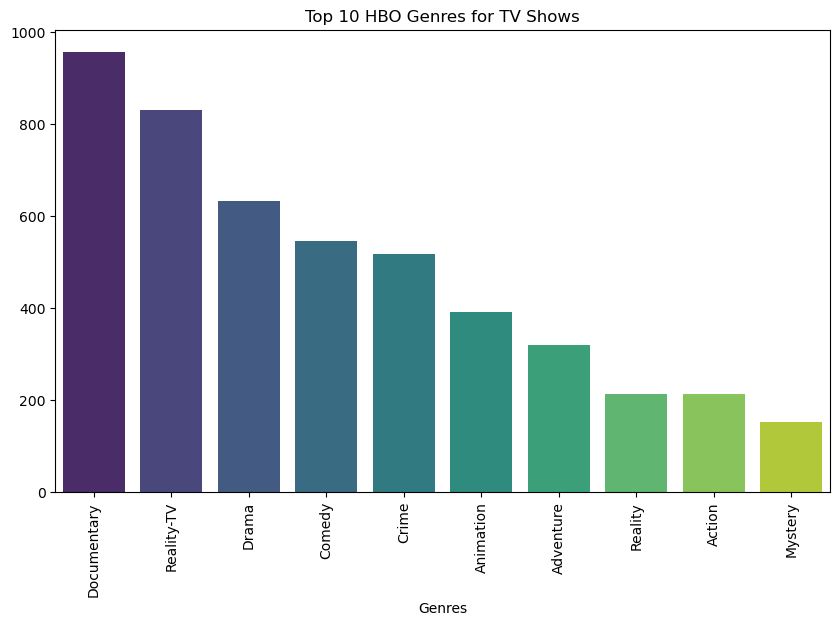

<Figure size 640x480 with 0 Axes>

In [108]:
# Filter the data to include only TV shows
hbo_tv = hbo_data_df[hbo_data_df['Type'] == 'tv']

# Split the genres and explode the dataframe so each genre has its own row
hbo_tv_genres = hbo_tv['Genres'].str.split(', ').explode('Genres')

# Get the top 10 genres in TV shows for HBO
top_tv_genres = hbo_tv_genres.value_counts().nlargest(10)

# Plot a bar chart for the top ten genres for TV shows for HBO
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tv_genres.index, y=top_tv_genres.values, palette="viridis")
plt.title("Top 10 HBO Genres for TV Shows")
plt.xticks(rotation=90)
plt.show()

# Save the bar chart
plt.savefig("Images/Top_10_HBO_Genres_for_TV_Shows.png")

WRITTEN ANALYSIS HERE FOR HBO 
1. Discuss the bar chart and which one is most popular out of tv or movies. Why? 
2. Discuss HBO movies by genre. Which genre is most popular. 

**Analyzing Netflix Data from 20__ to 2023**

In [88]:
# Once we know which streaming service has the highest average rating, we can create a bar chart to show the average rating of each movie on that streaming service

In [89]:
# This is where we will take a new data set of the most popular streaming service. 
# Hopefully here we can figure out why is is most popular based on the number of accounts. Or gender of the accounts.
# What is the avg plan duration 
# What is the avg plan cost
# What is the avg age of the accounts
# What was the peak year growth of the streaming service. Why? Go into disucssion in the written analysis. 

WRITTEN ANALYSIS HERE. 
1. answer quesitons above based on data (plan duration, cost, age, gender, peak growth year)

In [90]:
# Use GeoApify API to get the location of the streaming services and do a density plot for the most popular streaming to figure out where in the world it is the most popular